In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(style="white")

%matplotlib inline

In [2]:
loc = "data/Part 3 - Classification/Section 17 - Kernel SVM/Python/"

dataset = pd.read_csv(loc + 'Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = dataset.iloc[:, [0, 1]].values

In [4]:
y = dataset.iloc[:, 2].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [6]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)

In [10]:
cm

array([[64,  4],
       [ 3, 29]])

In [11]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [16]:
print(accuracies.mean())
print(accuracies.std())

0.9033333333333333
0.06574360974438671


In [27]:
# Applying the Grid Search to find the best model and the best parameters
parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.6, 0.7, 0.1, 0.001, 0.0001]}
    ]
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1
                          )

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

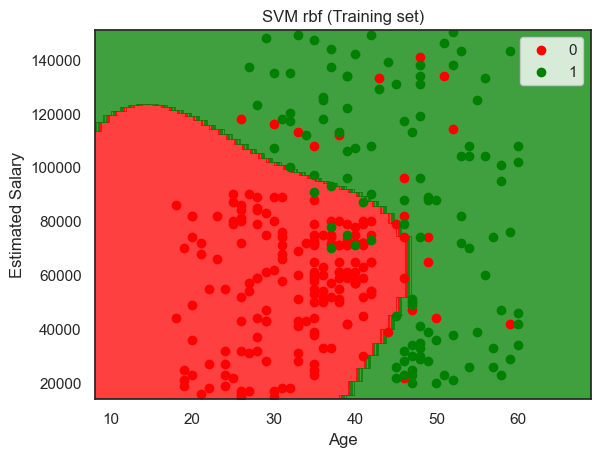

In [28]:
# Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['red', 'green'])(i), label = j)
plt.title('SVM rbf (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

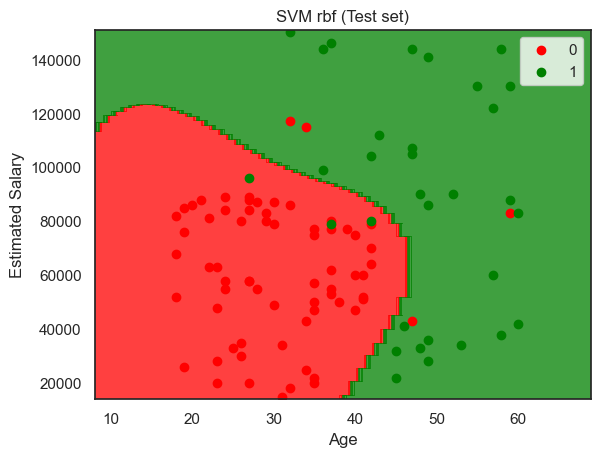

In [29]:
# Visualising the Test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['red', 'green'])(i), label = j)
plt.title('SVM rbf (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()